In [51]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import pandas as pd
import numpy as np

from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

In [3]:
df1= pd.read_csv('/Users/rongnie/Desktop/MS_HW3/DS1.csv')
df1.head()

,Grocery,Detergents,Channel
0,20.521,12.218,1
1,32.034,18.906,1
2,10.487,7.572,1
3,19.858,7.108,1
4,26.866,17.740,1


In [4]:
df1.Channel.value_counts()

 1    25
-1    25
Name: Channel, dtype: int64

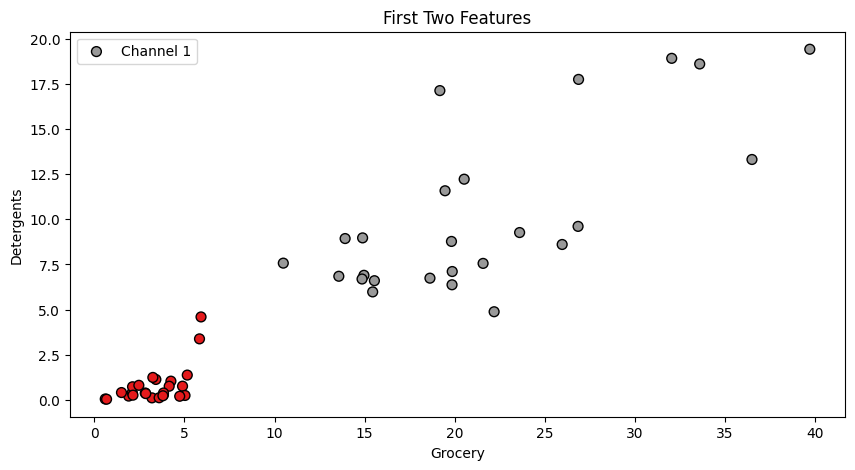

In [21]:
# Selecting features and target
X = df1[['Grocery', 'Detergents']]  # Only using 'Fresh' and 'Milk' for visualization
y = df1['Channel']

# Plot the data
plt.figure(figsize=(10, 5))
plt.scatter(X['Grocery'], X['Detergents'], c=y, cmap=plt.cm.Set1, s=50, edgecolors='k')
plt.title('First Two Features')
plt.xlabel('Grocery')
plt.ylabel('Detergents')
plt.legend(labels=['Channel 1', 'Channel 2'])
plt.show()

In [6]:
df2= pd.read_csv('/Users/rongnie/Desktop/MS_HW3/DS2.csv')
df2.head()

,Fresh,Milk,Channel
0,5.981,14.641,1
1,9.198,27.472,1
2,5.417,9.933,1
3,15.615,12.653,1
4,4.098,29.892,1


In [7]:
df2.Channel.value_counts()

 1    25
-1    25
Name: Channel, dtype: int64

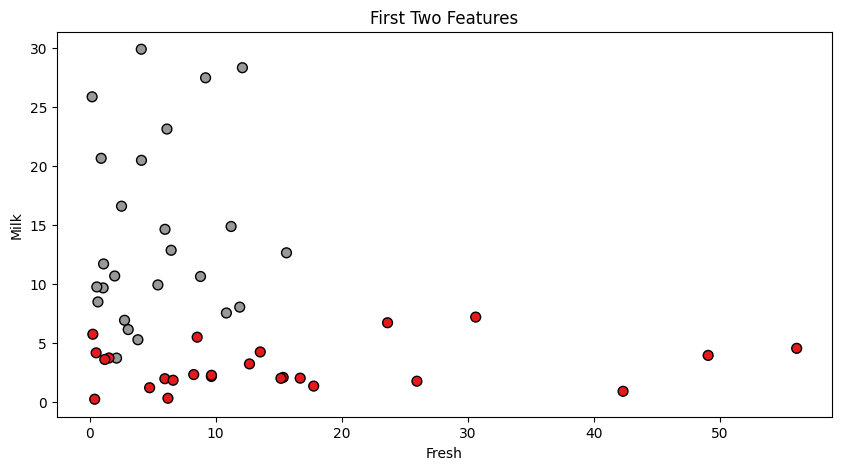

In [8]:
# Selecting features and target
X = df2[['Fresh', 'Milk']]  # Only using 'Fresh' and 'Milk' for visualization
y = df2['Channel']

# Plot the data
plt.figure(figsize=(10, 5))
plt.scatter(X['Fresh'], X['Milk'], c=y, cmap=plt.cm.Set1, s=50, edgecolors='k')
plt.title('First Two Features')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.show()

In [9]:
df3= pd.read_csv('/Users/rongnie/Desktop/MS_HW3/wholesale_customers_data.csv')
df3.head()

,Fresh,Milk,Grocery,Frozen,Detergents,Delicassen,Channel
0,5.981,14.641,20.521,2.005,12.218,0.445,1
1,9.198,27.472,32.034,3.232,18.906,5.130,1
2,5.417,9.933,10.487,0.038,7.572,1.282,1
3,15.615,12.653,19.858,4.425,7.108,2.379,1
4,4.098,29.892,26.866,2.616,17.740,1.340,1


**SVM**

In [49]:
# Selecting features and target
X = df3[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents', 'Delicassen']]
y = df3['Channel']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Soft-margin SVM with L2 penalty
svm_model_m4 = LinearSVC(C=1.0, loss='hinge', max_iter=10000, random_state=42)
svm_model_m4.fit(X_scaled, y)

# Optimal solution
coefficients_m4 = svm_model_m4.coef_
intercept_m4 = svm_model_m4.intercept_
deviations_m4 = svm_model_m4.decision_function(X_scaled)

print("Coefficients:", coefficients_m4)
print("Intercept:", intercept_m4)
print("Deviations from the goals:", deviations_m4)

Coefficients: [[ 0.14916492  0.61137549  1.15351284 -0.1559756   0.97701284  0.14293565]]
Intercept: [0.60187068]
Deviations from the goals: [ 2.96592716  6.81621797  0.87294018  2.08243804  5.82332831  3.3941955
  1.06801911  6.41007022  1.65792185  1.52513299  5.10503056  0.9999825
  3.74171314  3.88923987  1.60240997  2.58262672  0.86707194  0.99999504
  1.75544508  7.55207438  2.27365281  1.39532349  1.29922911  2.63022935
  2.75788215 -1.93965903 -2.19532196 -1.91702093 -2.45159674 -2.09957694
 -1.60865924 -1.41623724 -2.3572305  -1.07754711 -1.         -2.04489442
 -1.74286122 -1.84552984 -1.11362674 -1.89824151 -1.05623222 -1.48220369
 -2.061185   -1.58463023 -1.54147101 -1.89092696 -1.84215812 -0.52859441
 -1.50384161 -1.77531673]


In [50]:
# Soft-margin SVM with L1 penalty
svm_model_m5 = LinearSVC(penalty='l1', loss='squared_hinge', dual=False, C=1.0, random_state=42)
svm_model_m5.fit(X_scaled, y)

# Optimal solution
coefficients_m5 = svm_model_m5.coef_
intercept_m5 = svm_model_m5.intercept_
deviations_m5 = svm_model_m5.decision_function(X_scaled)

dict_m5 = {}
dict_m5["Coefficients"] = coefficients_m5
dict_m5["Intercept"] = intercept_m5
dict_m5["Deviations"] = deviations_m5

print("Coefficients:", coefficients_m5)
print("Intercept:", intercept_m5)
print("Deviations from the goals:", deviations_m5)


Coefficients: [[0.         0.10864271 1.29544255 0.         0.72126121 0.        ]]
Intercept: [0.41774732]
Deviations from the goals: [ 2.32891676  4.75870927  0.44905611  1.57872257  4.01132779  2.77997881
  0.85437418  4.85020723  1.54474836  1.42177979  4.45259401  0.88100174
  1.96478902  2.62324326  1.17425467  2.29533423  0.90617465  0.811023
  0.88396058  5.77408734  1.84832039  1.32342211  0.98868454  2.06370358
  2.62814436 -1.33637404 -1.63431908 -1.58457572 -1.84059138 -1.49001767
 -1.04352069 -1.12937614 -1.8321165  -1.21841971 -0.73301442 -1.50114408
 -1.4108399  -1.35334421 -1.21780037 -1.29248508 -1.51043599 -1.27518704
 -1.59646606 -1.67615355 -1.39440214 -1.50141183 -1.48078254 -0.54247433
 -1.3129402  -1.40099972]


In [43]:
print(dict_m5)

{'Coefficients': array([[0.        , 0.10864271, 1.29544255, 0.        , 0.72126121,
        0.        ]]), 'Intercept': array([0.41774732]), 'Deviations': array([ 2.32891676,  4.75870927,  0.44905611,  1.57872257,  4.01132779,
        2.77997881,  0.85437418,  4.85020723,  1.54474836,  1.42177979,
        4.45259401,  0.88100174,  1.96478902,  2.62324326,  1.17425467,
        2.29533423,  0.90617465,  0.811023  ,  0.88396058,  5.77408734,
        1.84832039,  1.32342211,  0.98868454,  2.06370358,  2.62814436,
       -1.33637404, -1.63431908, -1.58457572, -1.84059138, -1.49001767,
       -1.04352069, -1.12937614, -1.8321165 , -1.21841971, -0.73301442,
       -1.50114408, -1.4108399 , -1.35334421, -1.21780037, -1.29248508,
       -1.51043599, -1.27518704, -1.59646606, -1.67615355, -1.39440214,
       -1.50141183, -1.48078254, -0.54247433, -1.3129402 , -1.40099972])}


In [44]:
# Compute decision function for each data point
decision_function_values_m5 = svm_model_m5.decision_function(X_scaled)

# Initialize counter for correctly classified points
correctly_classified_count_m5 = 0

# Iterate through each data point and check classification
for i, decision_value in enumerate(decision_function_values_m5):
    # Check if sign of decision function matches true label
    if np.sign(decision_value) == np.sign(y.iloc[i]):
        correctly_classified_count_m5 += 1

# Print the number of correctly classified points
print("Number of correctly classified points for model (5):", correctly_classified_count_m5)


Number of correctly classified points: 50


In [45]:
# Soft-margin Max-SVM
svm_model_m6 = LinearSVC(C=1.0, loss='hinge', max_iter=10000, random_state=42)
svm_model_m6.fit(X_scaled, y)

# Optimal solution
coefficients_m6 = svm_model_m6.coef_
intercept_m6 = svm_model_m6.intercept_
deviations_m6 = svm_model_m6.decision_function(X_scaled)

print("Coefficients:", coefficients_m6)
print("Intercept:", intercept_m6)
print("Deviations from the goals:", deviations_m6)

Coefficients: [[ 0.14916492  0.61137549  1.15351284 -0.1559756   0.97701284  0.14293565]]
Intercept: [0.60187068]
Deviations from the goals: [ 2.96592716  6.81621797  0.87294018  2.08243804  5.82332831  3.3941955
  1.06801911  6.41007022  1.65792185  1.52513299  5.10503056  0.9999825
  3.74171314  3.88923987  1.60240997  2.58262672  0.86707194  0.99999504
  1.75544508  7.55207438  2.27365281  1.39532349  1.29922911  2.63022935
  2.75788215 -1.93965903 -2.19532196 -1.91702093 -2.45159674 -2.09957694
 -1.60865924 -1.41623724 -2.3572305  -1.07754711 -1.         -2.04489442
 -1.74286122 -1.84552984 -1.11362674 -1.89824151 -1.05623222 -1.48220369
 -2.061185   -1.58463023 -1.54147101 -1.89092696 -1.84215812 -0.52859441
 -1.50384161 -1.77531673]


In [47]:
# Compute decision function for each data point
decision_function_values_m6 = np.dot(X_scaled, coefficients_m6.T) + intercept_m6

# Initialize counter for correctly classified points
correctly_classified_count_m6 = 0

# Iterate through each data point and check classification
for i, decision_value in enumerate(decision_function_values_m6):
    # Check if sign of decision function matches true label
    if np.sign(decision_value) == np.sign(y.iloc[i]):
        correctly_classified_count_m6 += 1

# Print the number of correctly classified points
print("Number of correctly classified points for model (6):", correctly_classified_count_m6)

Number of correctly classified points: 50
